In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [9]:
df = pd.read_csv("/content/drive/MyDrive/netflix_titles.csv")
print(df)


     show_id     type                  title         director  \
0         s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1         s2  TV Show          Blood & Water              NaN   
2         s3  TV Show              Ganglands  Julien Leclercq   
3         s4  TV Show  Jailbirds New Orleans              NaN   
4         s5  TV Show           Kota Factory              NaN   
...      ...      ...                    ...              ...   
8802   s8803    Movie                 Zodiac    David Fincher   
8803   s8804  TV Show            Zombie Dumb              NaN   
8804   s8805    Movie             Zombieland  Ruben Fleischer   
8805   s8806    Movie                   Zoom     Peter Hewitt   
8806   s8807    Movie                 Zubaan      Mozez Singh   

                                                   cast        country  \
0                                                   NaN  United States   
1     Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa 

In [10]:
print("\n--- DATASET INFORMATION ---")
df.info()


--- DATASET INFORMATION ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [11]:

df.describe(include='all')
df.isnull().sum()



,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


In [12]:
# Debug: Duplicate records
duplicate_count = df.duplicated().sum()
print("\nNumber of duplicate records:", duplicate_count)



Number of duplicate records: 0


#Phase 2 Data Cleaning and preprocessing

In [49]:
# Debug: Missing values in important columns before filling
print("\nMissing 'director' before:", df['director'].isnull().sum())
print("Missing 'cast' before:", df['cast'].isnull().sum())
print("Missing 'country' before:", df['country'].isnull().sum())

# Fill missing values
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Not Available', inplace=True)
df['country'].fillna('Unknown', inplace=True)

# Debug: Verify missing values after filling
print("\nMissing 'director' after:", df['director'].isnull().sum())
print("Missing 'cast' after:", df['cast'].isnull().sum())
print("Missing 'country' after:", df['country'].isnull().sum())



Missing 'director' before: 0
Missing 'cast' before: 0
Missing 'country' before: 0

Missing 'director' after: 0
Missing 'cast' after: 0
Missing 'country' after: 0


/tmp/ipython-input-608/135388083.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-608/135388083.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

#Date Conversion

In [14]:
# Convert date_added to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Debug: Count invalid dates
invalid_dates = df['date_added'].isnull().sum()
print("\nInvalid or missing 'date_added' values:", invalid_dates)



Invalid or missing 'date_added' values: 98


#Feature Extraction (Year & Month)

In [15]:
# Extract year and month from date_added
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

# Debug: Preview extracted columns
print("\nSample of extracted year and month:")
print(df[['date_added', 'year_added', 'month_added']].head())


Sample of extracted year and month:
  date_added  year_added  month_added
0 2021-09-25      2021.0          9.0
1 2021-09-24      2021.0          9.0
2 2021-09-24      2021.0          9.0
3 2021-09-24      2021.0          9.0
4 2021-09-24      2021.0          9.0


#Duration Splitting

In [16]:
# Extract numeric duration value
df['duration_value'] = df['duration'].str.extract(r'(\d+)').astype(float)

# Extract duration type (min or season)
df['duration_type'] = df['duration'].str.extract('([A-Za-z]+)')

# Debug: Check unique duration types
print("\nUnique duration types:")
print(df['duration_type'].unique())

# Debug: Check for missing duration values
print("Missing duration values:", df['duration_value'].isnull().sum())



Unique duration types:
['min' 'Seasons' 'Season' nan]
Missing duration values: 3


#EDA(Exploratory data)

In [17]:
type_counts = df['type'].value_counts()

# Debug: Validate counts
print("\nMovies vs TV Shows distribution:")
print(type_counts)



Movies vs TV Shows distribution:
type
Movie      6131
TV Show    2676
Name: count, dtype: int64


In [18]:
top_countries = df['country'].value_counts().head(10)

# Debug: Validate top countries
print("\nTop 10 countries producing content:")
print(top_countries)



Top 10 countries producing content:
country
United States     2818
India              972
Unknown            831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64


In [19]:
content_by_year = df['release_year'].value_counts().sort_index()

# Debug: Check min and max years
print("\nContent release year range:")
print("Earliest year:", content_by_year.index.min())
print("Latest year:", content_by_year.index.max())



Content release year range:
Earliest year: 1925
Latest year: 2021


#Ratings Distribution


In [20]:
ratings_count = df['rating'].value_counts()

# Debug: Total ratings counted
print("\nTotal ratings categories:", ratings_count.shape[0])
print(ratings_count.head())



Total ratings categories: 17
rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
Name: count, dtype: int64


#Top Genres


In [21]:
genres = df['listed_in'].str.split(', ')
genres_exploded = genres.explode()
top_genres = genres_exploded.value_counts().head(10)

# Debug: Confirm genre split
print("\nTop 10 genres:")
print(top_genres)



Top 10 genres:
listed_in
International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1351
Documentaries                869
Action & Adventure           859
TV Dramas                    763
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: count, dtype: int64


In [22]:
movie_df = df[df['type'] == 'Movie']

# Debug: Number of movies
print("\nTotal number of movies:", movie_df.shape[0])

avg_movie_duration = movie_df['duration_value'].mean()
print("Average movie duration (minutes):", avg_movie_duration)


Total number of movies: 6131
Average movie duration (minutes): 99.57718668407311


#Content Added Over Time

In [23]:
content_added = df.groupby('year_added').size()

# Debug: Preview yearly additions
print("\nNetflix content added per year:")
print(content_added.tail())



Netflix content added per year:
year_added
2017.0    1164
2018.0    1625
2019.0    1999
2020.0    1878
2021.0    1498
dtype: int64


#Phase 4 Data Visualization

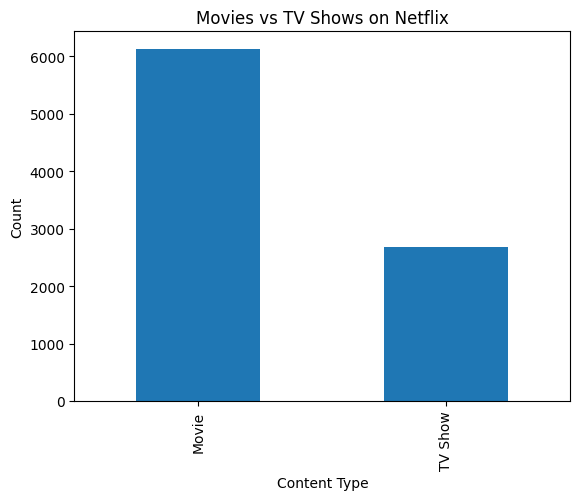

In [24]:
# Movies vs TV Shows
type_counts.plot(kind='bar')
plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()


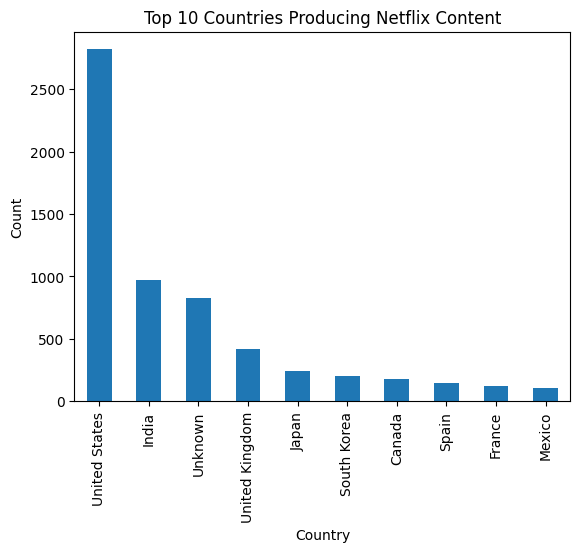

In [25]:
# Top 10 countries
top_countries.plot(kind='bar')
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Country")
plt.ylabel("Count")
plt.show()


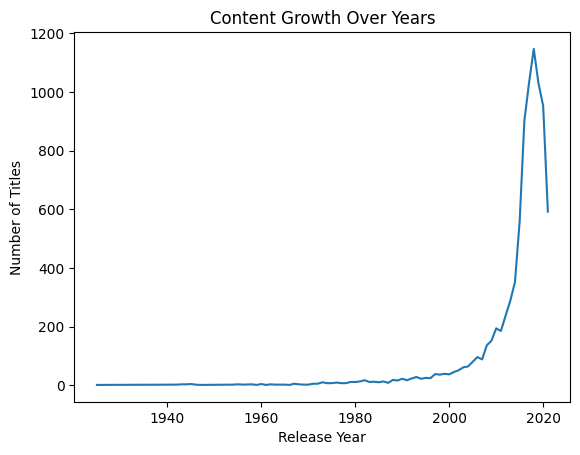

In [26]:
# Content growth by year
content_by_year.plot(kind='line')
plt.title("Content Growth Over Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.show()


#Rating Distribution


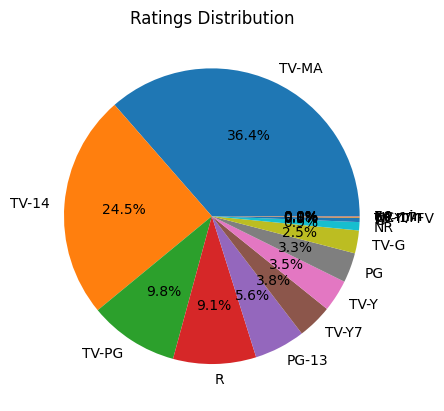

In [27]:
# Ratings distribution
ratings_count.plot(kind='pie', autopct='%1.1f%%')
plt.title("Ratings Distribution")
plt.ylabel("")
plt.show()


#More Legends

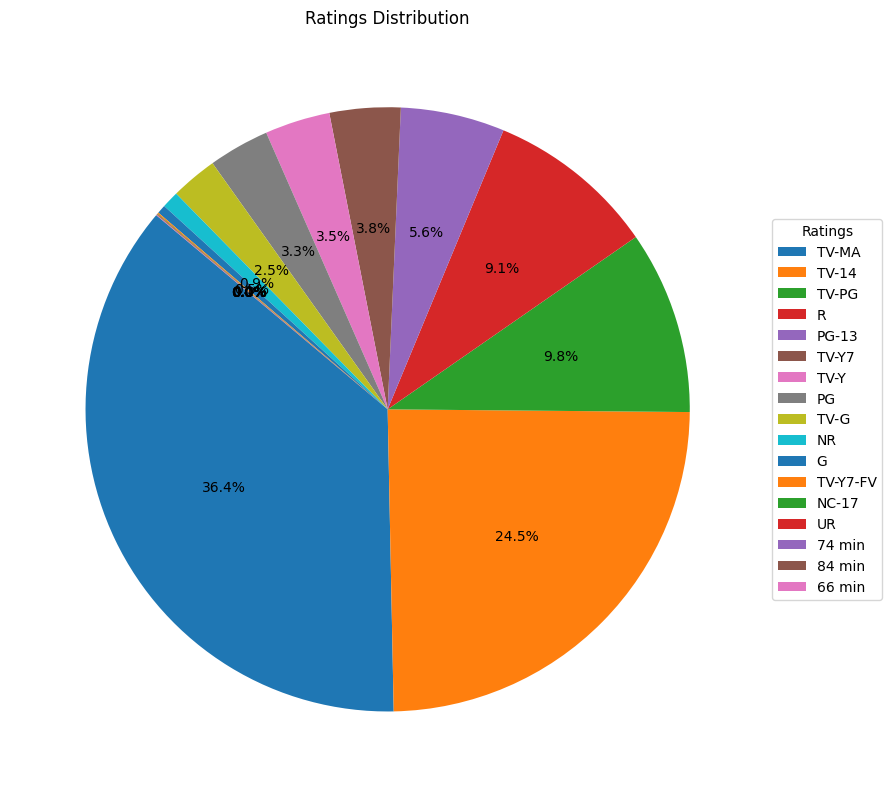

In [28]:
# Ratings distribution (legend outside to avoid overlap)
plt.figure(figsize=(9, 9))

ratings_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    labels=None,          # Remove labels from pie
    startangle=140
)

plt.title("Ratings Distribution")
plt.ylabel("")

# Place legend outside the pie
plt.legend(
    ratings_count.index,
    title="Ratings",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()


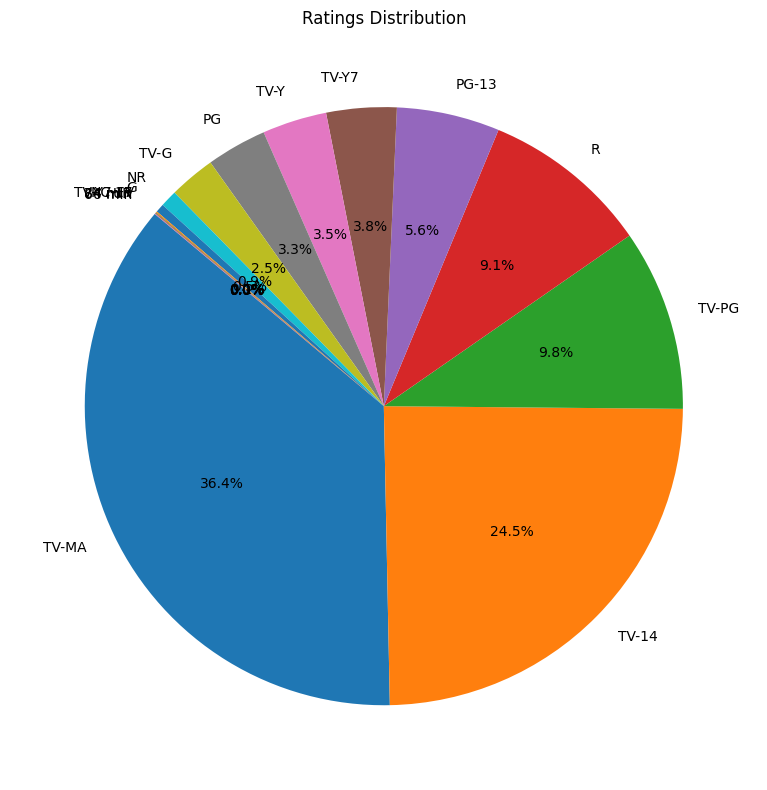

In [29]:
# Ratings distribution (reformatted - larger figure)
plt.figure(figsize=(8, 8))

ratings_count.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140
)

plt.title("Ratings Distribution")
plt.ylabel("")  # Remove y-axis label
plt.tight_layout()
plt.show()


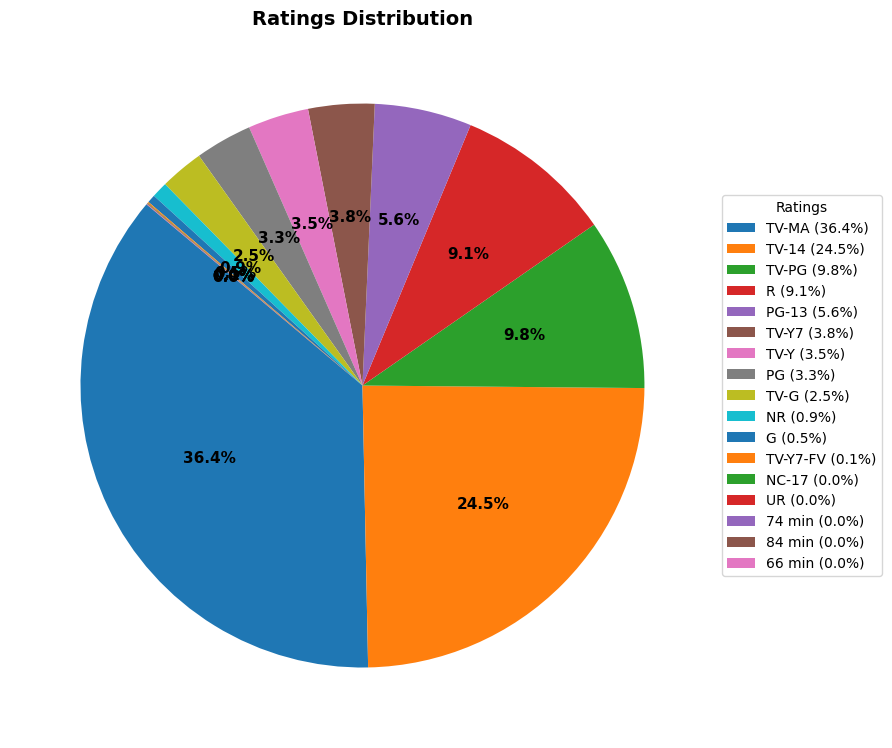

In [30]:
# Create percentage labels beforehand
percentages = (ratings_count / ratings_count.sum()) * 100

# Create legend labels with percentages
legend_labels = [
    f"{label} ({percentages[label]:.1f}%)"
    for label in ratings_count.index
]

# Plot pie chart
plt.figure(figsize=(9, 9))

wedges, texts, autotexts = plt.pie(
    ratings_count,
    autopct='%1.1f%%',
    startangle=140,
    labels=None,   # Remove labels from pie to avoid overlap
    textprops={'fontsize': 11}
)

# Make percentage texts bold
for autotext in autotexts:
    autotext.set_fontweight('bold')

plt.title("Ratings Distribution", fontsize=14, fontweight='bold')
plt.ylabel("")

# Add legend with percentages
plt.legend(
    wedges,
    legend_labels,
    title="Ratings",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

plt.tight_layout()
plt.show()


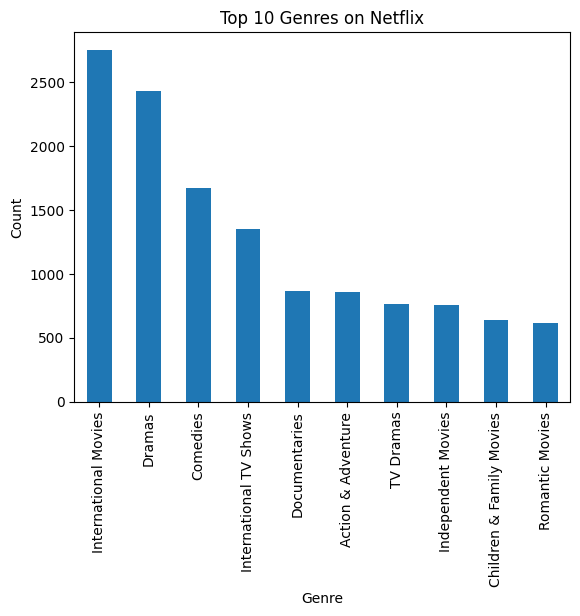

In [31]:
# Top genres
top_genres.plot(kind='bar')
plt.title("Top 10 Genres on Netflix")
plt.xlabel("Genre")
plt.ylabel("Count")
plt.show()


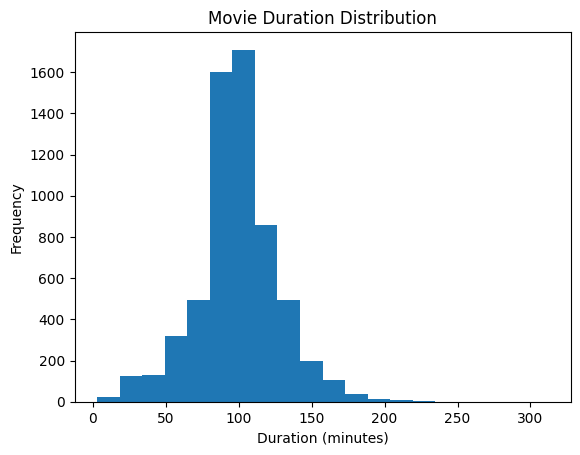

In [32]:
# Movie duration histogram
movie_df['duration_value'].plot(kind='hist', bins=20)
plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")
plt.show()


#Phase 6: Advanced Data Visualization using Seaborn


In [33]:
# Import seaborn for advanced visualizations
import seaborn as sns

# Set a base theme (clean background)
sns.set_theme(style="whitegrid")

print("Seaborn imported successfully")


Seaborn imported successfully


Content types: ['Movie' 'TV Show']


/tmp/ipython-input-608/1409785530.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(


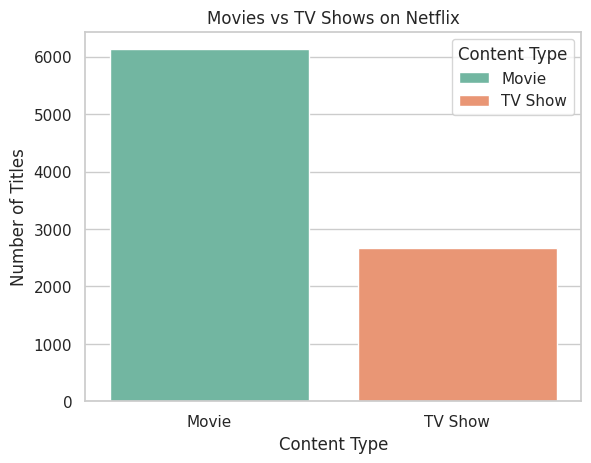

In [34]:
# Debug: Check content types
print("Content types:", df['type'].unique())

# Count plot
sns.countplot(
    data=df,
    x='type',
    palette='Set2'
)

plt.title("Movies vs TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Number of Titles")

# Legend (manual, for clarity)
plt.legend(title="Content Type", labels=df['type'].unique())

plt.show()


#Visualization 2: Top 10 Countries (Horizontal Bar Plot)

/tmp/ipython-input-608/2010147351.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


          country  count
0   United States   2818
1           India    972
2         Unknown    831
3  United Kingdom    419
4           Japan    245
5     South Korea    199
6          Canada    181
7           Spain    145
8          France    124
9          Mexico    110


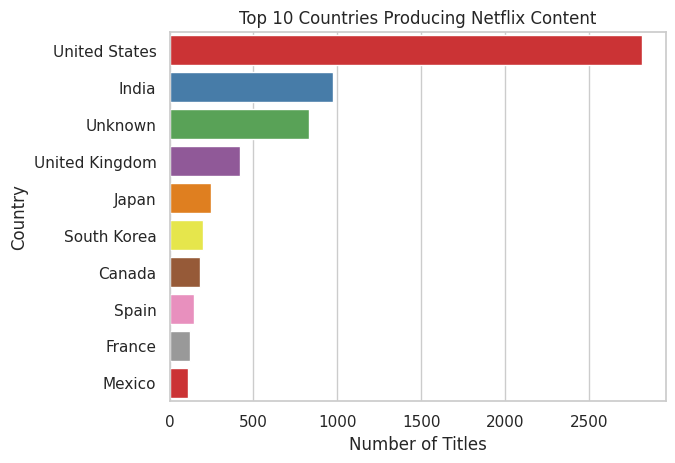

In [35]:
# Prepare top 10 countries data
top_countries_df = df['country'].value_counts().head(10).reset_index()
top_countries_df.columns = ['country', 'count']

print(top_countries_df)

# Bar plot
sns.barplot(
    data=top_countries_df,
    x='count',
    y='country',
    palette='Set1'
)

plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Number of Titles")
plt.ylabel("Country")

plt.show()


Year range: 1925 - 2021


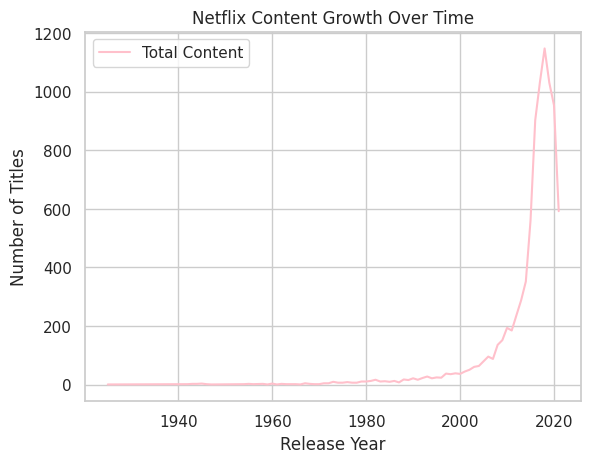

In [36]:
# Prepare yearly content data
yearly_df = df.groupby('release_year').size().reset_index(name='count')

print("Year range:",
      yearly_df['release_year'].min(),
      "-",
      yearly_df['release_year'].max())

# Line plot
sns.lineplot(
    data=yearly_df,
    x='release_year',
    y='count',
    color='pink',
    label='Total Content'
)

plt.title("Netflix Content Growth Over Time")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")

plt.legend()
plt.show()

  rating  count
0  TV-MA   3207
1  TV-14   2160
2  TV-PG    863
3      R    799
4  PG-13    490


/tmp/ipython-input-608/1612837412.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


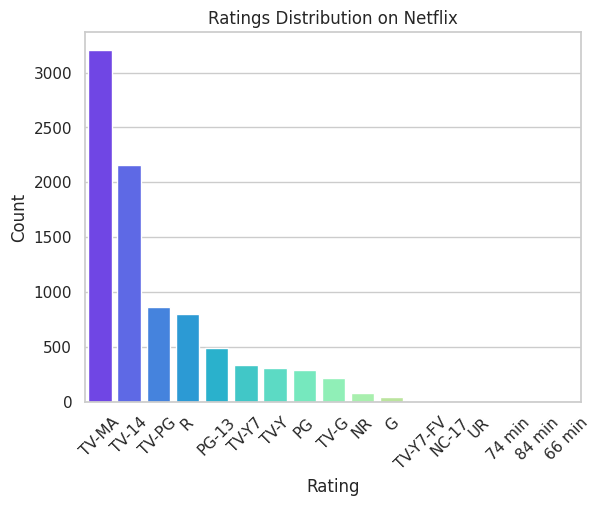

In [37]:
# Prepare ratings data
ratings_df = df['rating'].value_counts().reset_index()
ratings_df.columns = ['rating', 'count']

print(ratings_df.head())

# Bar plot
sns.barplot(
    data=ratings_df,
    x='rating',
    y='count',
    palette='rainbow'
)

plt.title("Ratings Distribution on Netflix")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)

plt.show()


count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_value, dtype: float64


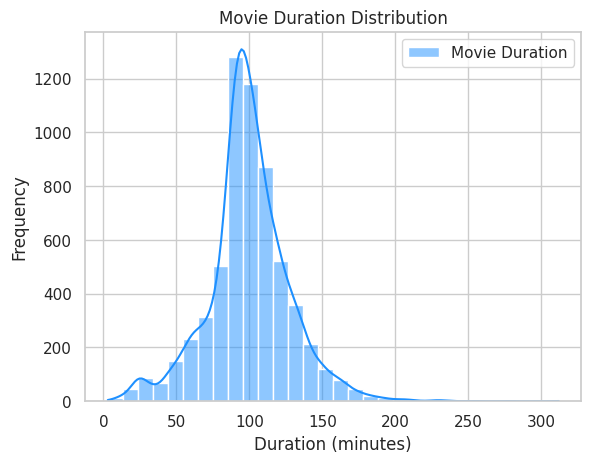

In [38]:
# Filter movie data
movie_df = df[df['type'] == 'Movie']

print(movie_df['duration_value'].describe())

# Histogram with KDE
sns.histplot(
    movie_df['duration_value'],
    bins=30,
    kde=True,
    color='dodgerblue',
    label='Movie Duration'
)

plt.title("Movie Duration Distribution")
plt.xlabel("Duration (minutes)")
plt.ylabel("Frequency")

plt.legend()
plt.show()

duration_type
min        6128
Season     1793
Seasons     883
Name: count, dtype: int64


/tmp/ipython-input-608/1527924506.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


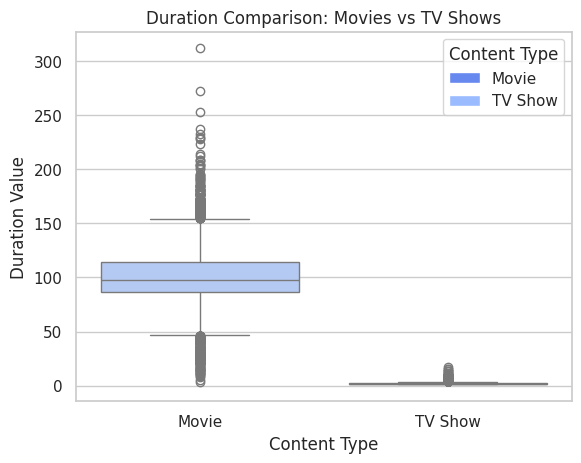

In [39]:
print(df['duration_type'].value_counts())

# Box plot
sns.boxplot(
    data=df,
    x='type',
    y='duration_value',
    palette='coolwarm'
)

plt.title("Duration Comparison: Movies vs TV Shows")
plt.xlabel("Content Type")
plt.ylabel("Duration Value")

# Manual legend
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor=sns.color_palette('coolwarm')[0], label='Movie'),
    Patch(facecolor=sns.color_palette('coolwarm')[1], label='TV Show')
]
plt.legend(handles=legend_elements, title="Content Type")

plt.show()

Number of movies used in scatter plot: 6128


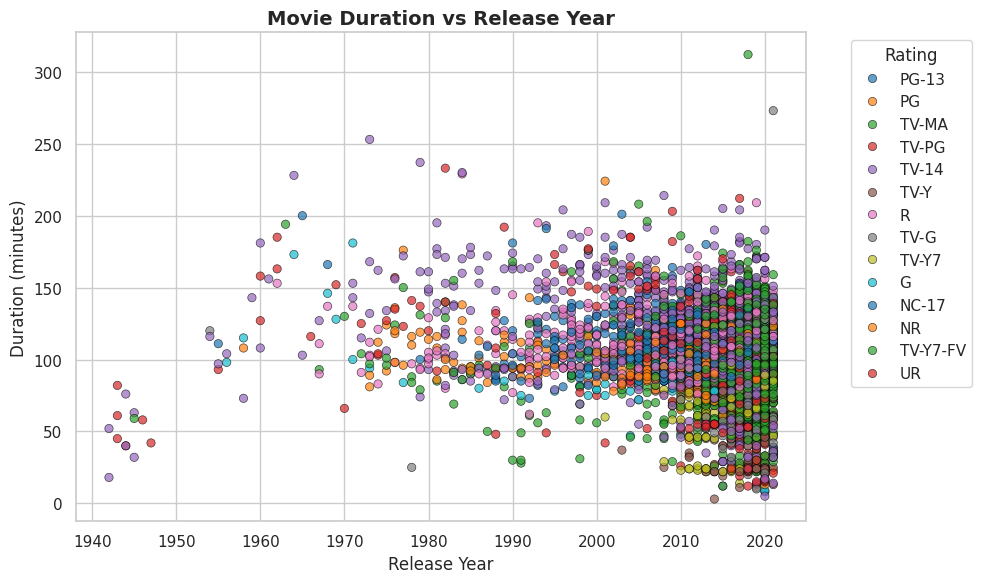

In [40]:
# Filter only movies for meaningful duration analysis
movie_scatter_df = df[df['type'] == 'Movie'].dropna(subset=['duration_value', 'release_year'])

# Debug: Check dataset size
print("Number of movies used in scatter plot:", movie_scatter_df.shape[0])

# Create scatter plot
plt.figure(figsize=(10, 6))

sns.scatterplot(
    data=movie_scatter_df,
    x='release_year',
    y='duration_value',
    hue='rating',              # Color points by rating
    palette='tab10',           # Vibrant categorical colors
    alpha=0.7,
    edgecolor='black'
)

plt.title("Movie Duration vs Release Year", fontsize=14, fontweight='bold')
plt.xlabel("Release Year")
plt.ylabel("Duration (minutes)")

# Place legend outside for clarity
plt.legend(
    title="Rating",
    bbox_to_anchor=(1.05, 1),
    loc='upper left'
)

plt.tight_layout()
plt.show()


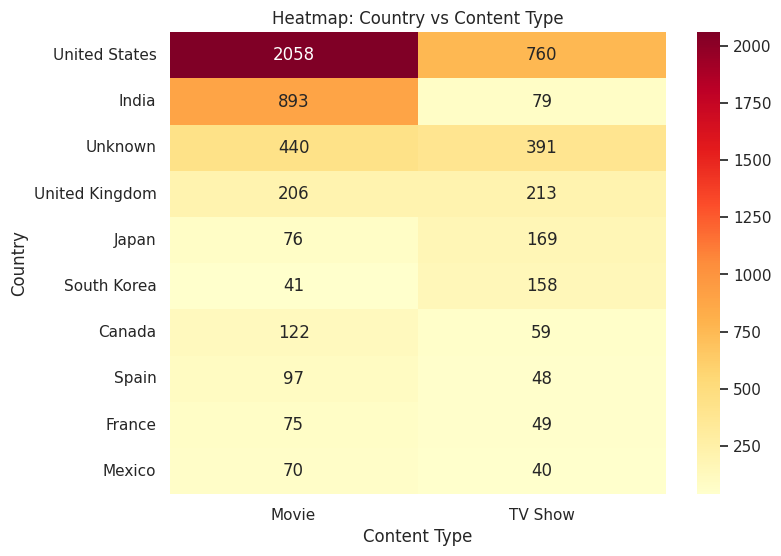

In [41]:
# Create cross-tabulation
country_type = pd.crosstab(df['country'], df['type'])

# Select top 10 countries only
top_countries = country_type.sum(axis=1).sort_values(ascending=False).head(10).index
heatmap_data = country_type.loc[top_countries]

plt.figure(figsize=(8, 6))

sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='d',
    cmap='YlOrRd'
)

plt.title("Heatmap: Country vs Content Type")
plt.xlabel("Content Type")
plt.ylabel("Country")
plt.show()


/tmp/ipython-input-608/2678333696.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


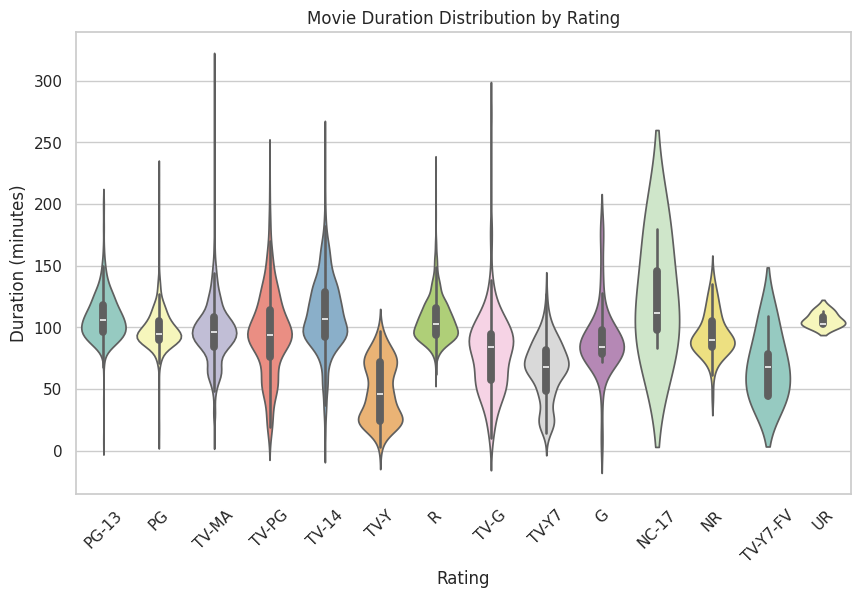

In [42]:
movie_violin_df = df[df['type'] == 'Movie'].dropna(subset=['duration_value'])

plt.figure(figsize=(10, 6))

sns.violinplot(
    data=movie_violin_df,
    x='rating',
    y='duration_value',
    palette='Set3'
)

plt.title("Movie Duration Distribution by Rating")
plt.xlabel("Rating")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.show()


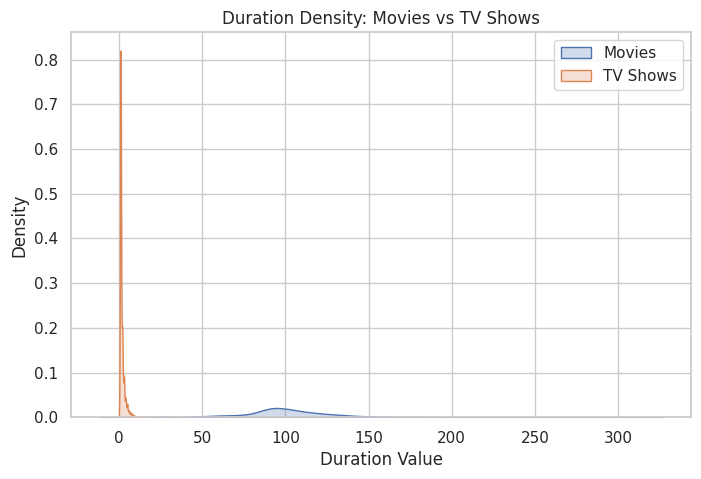

In [43]:
plt.figure(figsize=(8, 5))

sns.kdeplot(
    df[df['type'] == 'Movie']['duration_value'],
    label='Movies',
    fill=True
)

sns.kdeplot(
    df[df['type'] == 'TV Show']['duration_value'],
    label='TV Shows',
    fill=True
)

plt.title("Duration Density: Movies vs TV Shows")
plt.xlabel("Duration Value")
plt.ylabel("Density")
plt.legend()
plt.show()


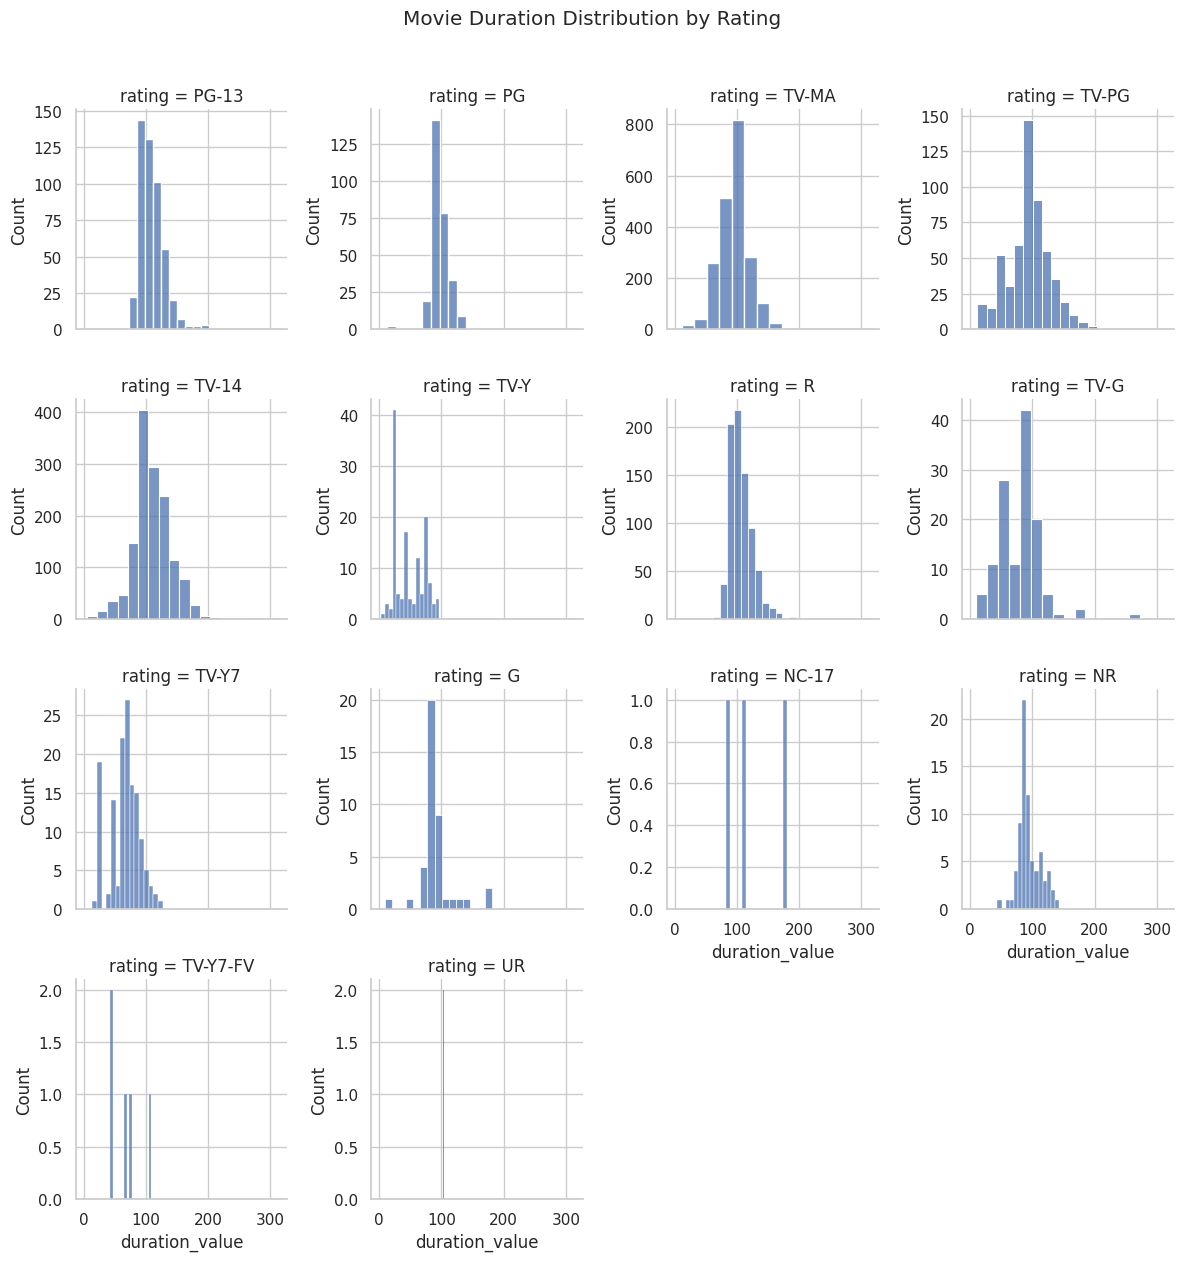

In [44]:
facet_df = df[df['type'] == 'Movie'].dropna(subset=['duration_value'])

g = sns.FacetGrid(
    facet_df,
    col='rating',
    col_wrap=4,
    height=3,
    sharey=False
)

g.map(sns.histplot, 'duration_value', bins=15)
g.fig.suptitle("Movie Duration Distribution by Rating", y=1.05)
plt.show()


Rating to Color Mapping:
PG-13 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
PG (1.0, 0.4980392156862745, 0.054901960784313725)
TV-MA (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
TV-PG (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
TV-14 (0.5803921568627451, 0.403921568627451, 0.7411764705882353)
TV-Y (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)
R (0.8901960784313725, 0.4666666666666667, 0.7607843137254902)
TV-G (0.4980392156862745, 0.4980392156862745, 0.4980392156862745)
TV-Y7 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333)
G (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)
NC-17 (0.12156862745098039, 0.4666666666666667, 0.7058823529411765)
NR (1.0, 0.4980392156862745, 0.054901960784313725)
nan (0.17254901960784313, 0.6274509803921569, 0.17254901960784313)
TV-Y7-FV (0.8392156862745098, 0.15294117647058825, 0.1568627450980392)
UR (0.5803921568627451, 0.403921568627451, 0.7411764705882353)


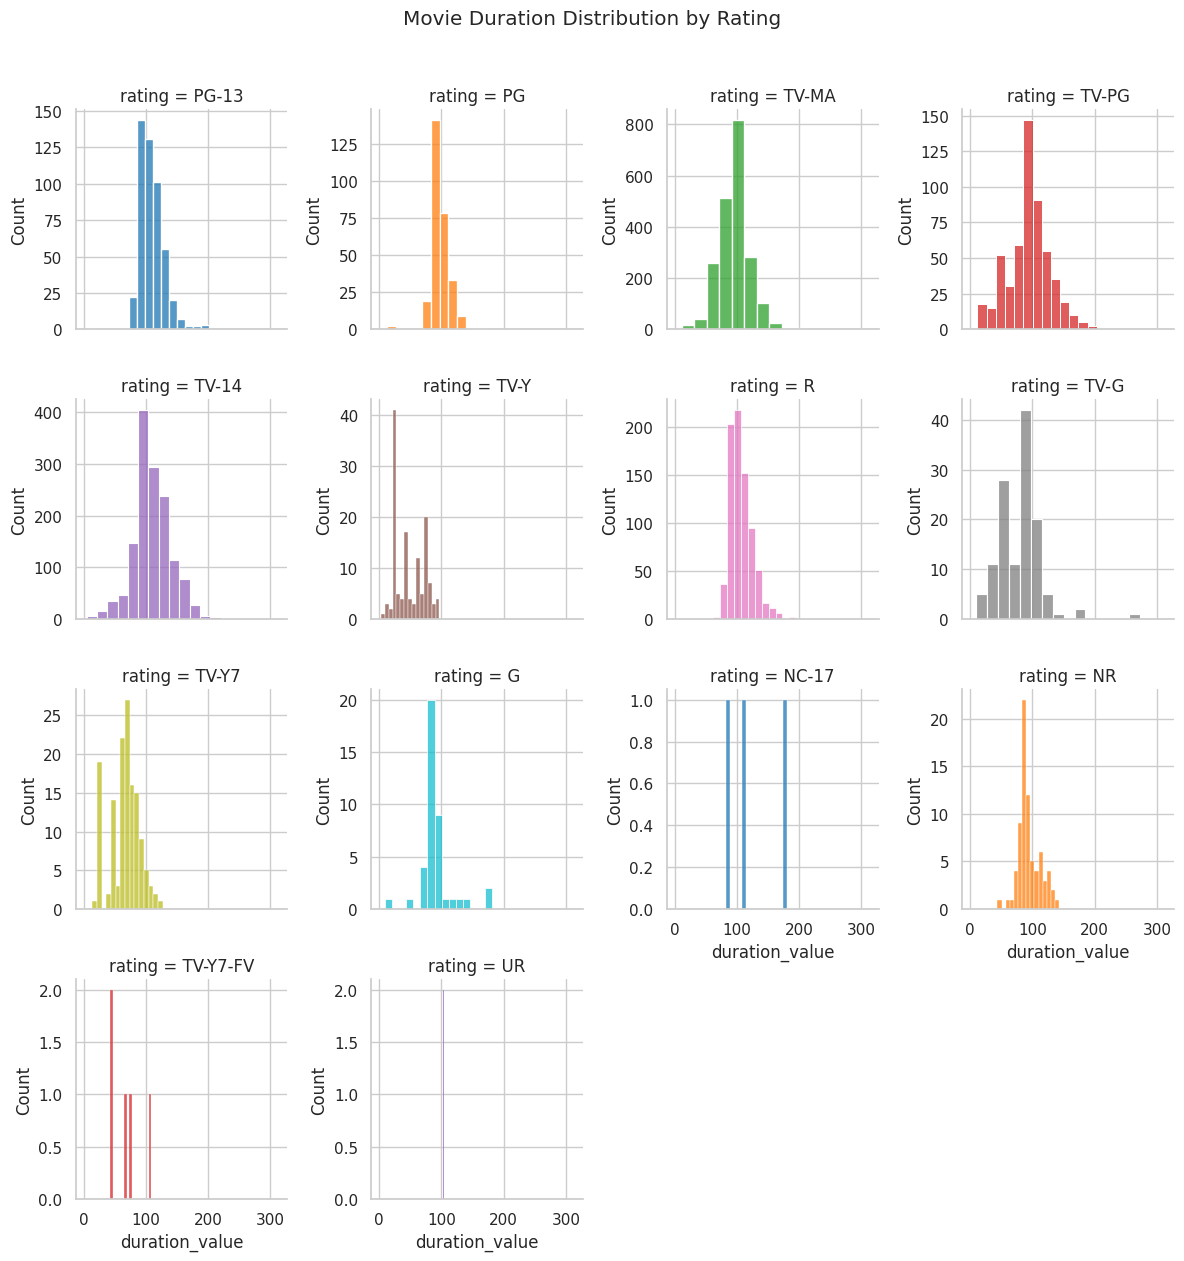

In [45]:
# Filter movie data
facet_df = df[df['type'] == 'Movie'].dropna(subset=['duration_value'])

# Get unique ratings
ratings = facet_df['rating'].unique()

# Create a vibrant color palette with one color per rating
palette = sns.color_palette("tab10", n_colors=len(ratings))

# Create a mapping from rating to color
rating_color_map = dict(zip(ratings, palette))

# Debug: Show color mapping
print("Rating to Color Mapping:")
for k, v in rating_color_map.items():
    print(k, v)

# Create FacetGrid
g = sns.FacetGrid(
    facet_df,
    col='rating',
    col_wrap=4,
    height=3,
    sharey=False
)

# Custom plotting function to apply different colors
def colored_histplot(data, **kwargs):
    rating = data['rating'].iloc[0]          # Identify current facet
    color = rating_color_map[rating]          # Get assigned color
    sns.histplot(
        data=data,
        x='duration_value',
        bins=15,
        color=color
    )

# Map custom function
g.map_dataframe(colored_histplot)

# Add main title
g.fig.suptitle("Movie Duration Distribution by Rating", y=1.05)

plt.show()


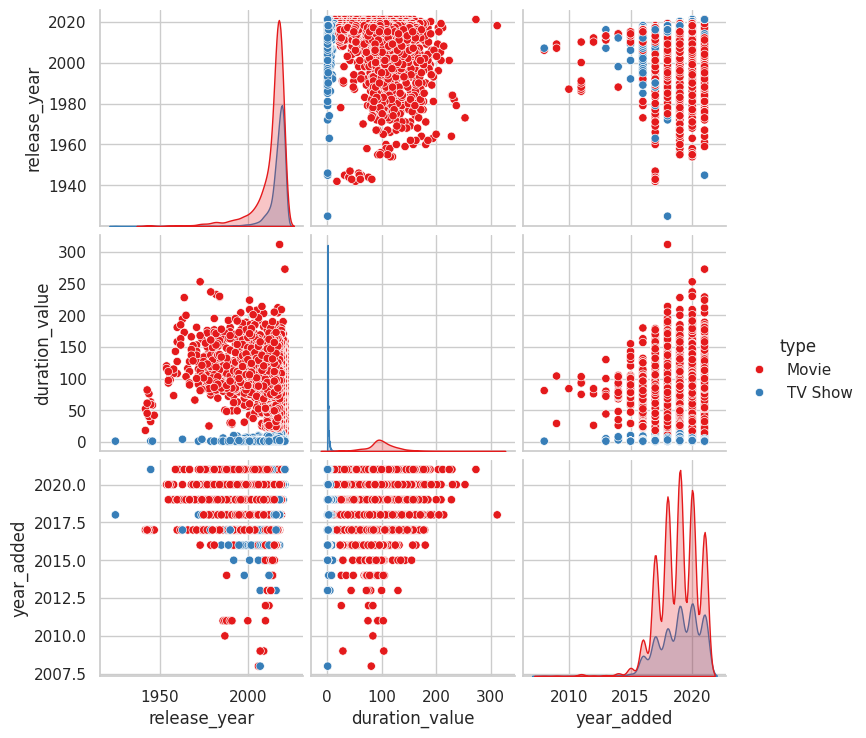

In [46]:
# Create a categorical column for coloring
pair_df = df[['release_year', 'duration_value', 'year_added', 'type']].dropna()

sns.pairplot(
    pair_df,
    hue='type',                 # Color by content type
    palette='Set1',             # Vibrant, distinct colors
    diag_kind='kde'             # Smooth diagonal plots
)

plt.show()



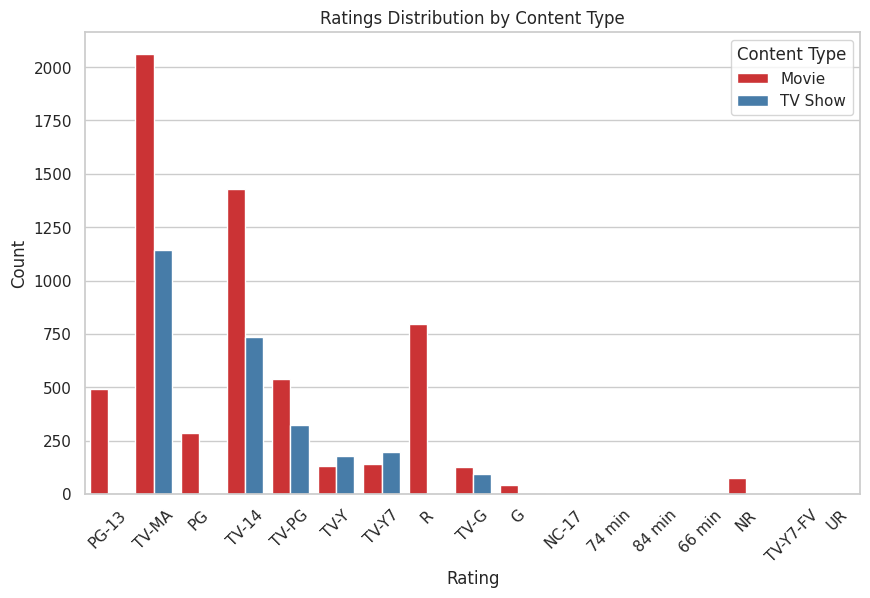

In [47]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=df,
    x='rating',
    hue='type',
    palette='Set1'
)

plt.title("Ratings Distribution by Content Type")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Content Type")
plt.show()


/tmp/ipython-input-608/3012524508.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


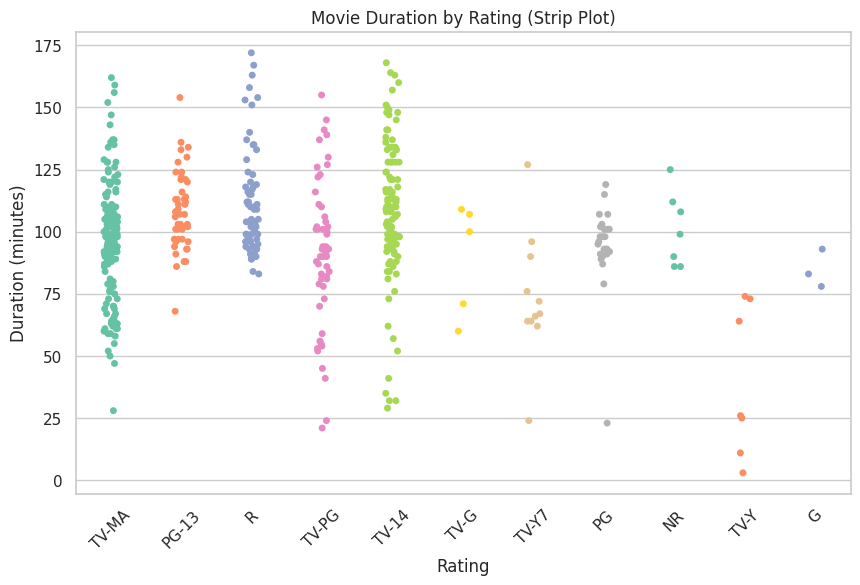

In [48]:
sample_df = df[df['type'] == 'Movie'].sample(500, random_state=42)

plt.figure(figsize=(10, 6))

sns.stripplot(
    data=sample_df,
    x='rating',
    y='duration_value',
    palette='Set2',
    jitter=True
)

plt.title("Movie Duration by Rating (Strip Plot)")
plt.xlabel("Rating")
plt.ylabel("Duration (minutes)")
plt.xticks(rotation=45)
plt.show()
